<a href="https://colab.research.google.com/github/shikhaguptadr/Natural-Language-Processing/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

### **Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Collection**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 5:- Natural language processing(NLP)/Copy of Copy of movies.csv')

In [ ]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
df.head(20)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom

In [ ]:
df['homepage'].fillna('').head(20)

,homepage
0,http://www.avatarmovie.com/
1,http://disney.go.com/disneypictures/pirates/
2,http://www.sonypictures.com/movies/spectre/
3,http://www.thedarkknightrises.com/
4,http://movies.disney.com/john-carter
5,http://www.sonypictures.com/movies/spider-man3/
6,http://disney.go.com/disneypictures/tangled/
7,http://marvel.com/movies/movie/193/avengers_ag...
8,http://harrypotter.warnerbros.com/harrypottera...
9,http://www.batmanvsupermandawnofjustice.com/


In [ ]:
df.shape

(4803, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [ ]:
df.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [ ]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
features = ['genres','keywords','tagline','cast','director']

In [ ]:
for i in features:
  df[i] = df[i].fillna('')

In [ ]:
combine_features = df['genres'] + ' ' + df['keywords'] + ' ' + df['tagline'] + ' ' + df['cast'] + ' ' + df['director']

In [ ]:
combine_features

,0
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...
...,...
4798,Action Crime Thriller united states\u2013mexic...
4799,Comedy Romance A newlywed couple's honeymoon ...
4800,Comedy Drama Romance TV Movie date love at fir...
4801,A New Yorker in Shanghai Daniel Henney Eliza...


## **Converting text data into num data**

In [ ]:
vector = TfidfVectorizer()
num_vector = vector.fit_transform(combine_features)
print(num_vector[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29 stored elements and shape (1, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  (0, 10229)	0.16058685400095302
  (0, 13024)	0.1942362060108871
  (0, 77

## **Similarity scores using cosine similarity**

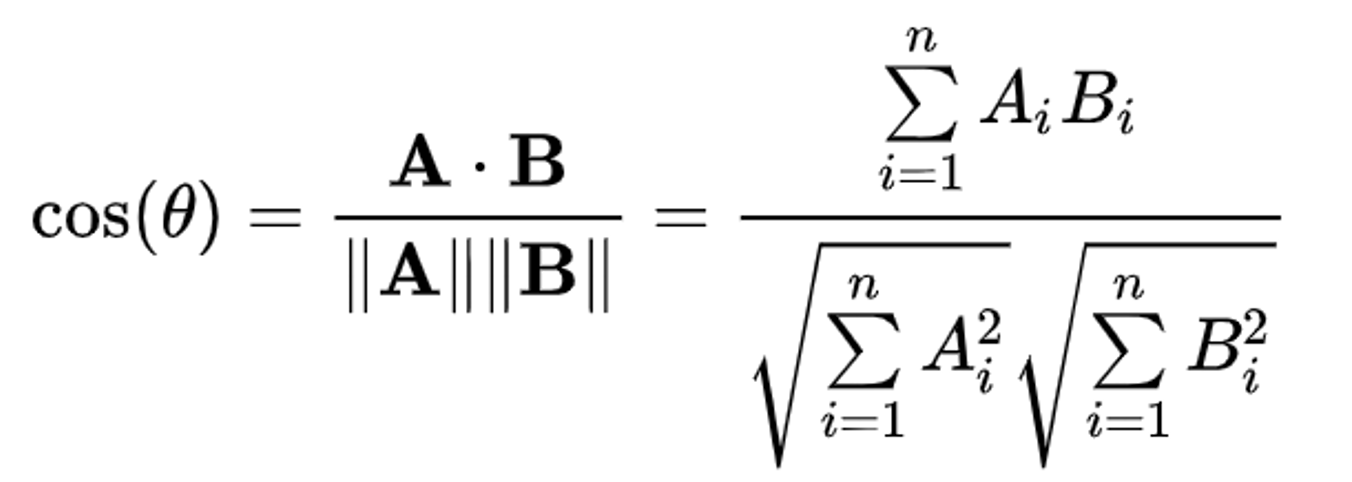

In [ ]:
similarty = cosine_similarity(num_vector)
print(similarty)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
similarty.shape

(4803, 4803)

## **Getting movie name from user**

In [ ]:
movie_name = 'iron mane'

In [ ]:
list_of_title = df['title'].tolist()
print(list_of_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
get_match = difflib.get_close_matches(movie_name,list_of_title)
print(get_match)

['Iron Man', 'Gridiron Gang', 'Iron Man 3']


In [ ]:
close_match = get_match[0]
close_match

'Iron Man'

In [ ]:
index_of_movie = df[df.title == close_match]['index'].values[0]
index_of_movie

np.int64(68)

In [ ]:
df['title'][68]

'Iron Man'

### **GETTING THE SIMILER MOVIES**

In [ ]:
similer_score = list(enumerate(similarty[index_of_movie]))
print(similer_score)

[(0, np.float64(0.033570748780675445)), (1, np.float64(0.0546448279236134)), (2, np.float64(0.013735500604224325)), (3, np.float64(0.006468756104392058)), (4, np.float64(0.03268943310073387)), (5, np.float64(0.013907256685755475)), (6, np.float64(0.07692837576335508)), (7, np.float64(0.23944423963486416)), (8, np.float64(0.007882387851851008)), (9, np.float64(0.07599206098164224)), (10, np.float64(0.07536074882460439)), (11, np.float64(0.01192606921174529)), (12, np.float64(0.013707618139948932)), (13, np.float64(0.01237607492508997)), (14, np.float64(0.09657127116284187)), (15, np.float64(0.007286271383816743)), (16, np.float64(0.22704403782296806)), (17, np.float64(0.013112928084103857)), (18, np.float64(0.04140526820609594)), (19, np.float64(0.07883282546834255)), (20, np.float64(0.07981173664799916)), (21, np.float64(0.011266873271064948)), (22, np.float64(0.006892575895462364)), (23, np.float64(0.006599097891242659)), (24, np.float64(0.012665208122549735)), (25, np.float64(0.0)), 

In [ ]:
sort_similer_score = sorted(similer_score,key = lambda x:x[1],reverse = True)
print(sort_similer_score)

[(68, np.float64(1.0)), (79, np.float64(0.40890433998005965)), (31, np.float64(0.3146705244947752)), (7, np.float64(0.23944423963486416)), (16, np.float64(0.22704403782296806)), (26, np.float64(0.21566241096831162)), (85, np.float64(0.20615862984665334)), (182, np.float64(0.19573956139611612)), (511, np.float64(0.16702973947860683)), (3623, np.float64(0.1609246088135586)), (64, np.float64(0.1529992413944514)), (203, np.float64(0.1481866794866512)), (174, np.float64(0.1471993120942043)), (4401, np.float64(0.14505971470107848)), (101, np.float64(0.14401677581826292)), (46, np.float64(0.14216268867232232)), (169, np.float64(0.1380947013224906)), (1740, np.float64(0.1362438264169076)), (94, np.float64(0.13616819579029016)), (788, np.float64(0.13305895074229218)), (126, np.float64(0.13263982780511063)), (131, np.float64(0.13137698586006535)), (33, np.float64(0.13089810941050173)), (2487, np.float64(0.12309731939910509)), (783, np.float64(0.12162995562040377)), (138, np.float64(0.11846458075

In [ ]:
df['title'][68]

'Iron Man'

In [ ]:
df['title'][79]

'Iron Man 2'

In [ ]:
df['title'][31]

'Iron Man 3'

In [ ]:
df['title'][7]

'Avengers: Age of Ultron'

In [ ]:
k = []
for i in range(30):
  index = sort_similer_score[i][0]
  print(df['title'][index])

Iron Man
Iron Man 2
Iron Man 3
Avengers: Age of Ultron
The Avengers
Captain America: Civil War
Captain America: The Winter Soldier
Ant-Man
X-Men
Made
X-Men: Apocalypse
X2
The Incredible Hulk
The Helix... Loaded
X-Men: First Class
X-Men: Days of Future Past
Captain America: The First Avenger
Kick-Ass 2
Guardians of the Galaxy
Deadpool
Thor: The Dark World
G-Force
X-Men: The Last Stand
Duets
Mortdecai
The Last Airbender
Southland Tales
Zathura: A Space Adventure
Sky Captain and the World of Tomorrow
The Amazing Spider-Man 2


## **Movie Recommendation Sytem**

In [ ]:
movie_name = input('Enter your favourite movie name :')
list_of_title = df['title'].tolist()
get_match = difflib.get_close_matches(movie_name,list_of_title)
close_match = get_match[0]
index_of_movie = df[df.title == close_match]['index'].values[0]
similer_score = list(enumerate(similarty[index_of_movie]))
sort_similer_score = sorted(similer_score,key = lambda x:x[1],reverse = True)

print('Movies suggested for you : \n')

k = []
for i in range(30):
  index = sort_similer_score[i][0]
  print(df['title'][index])

Enter your favourite movie name :bat man
Movies suggested for you : 

Batman
Batman Returns
Batman & Robin
The Dark Knight Rises
Batman Begins
The Dark Knight
A History of Violence
Superman
Beetlejuice
Bedazzled
Mars Attacks!
The Sentinel
Planet of the Apes
Man of Steel
Suicide Squad
The Mask
Salton Sea
Spider-Man 3
The Postman Always Rings Twice
Hang 'em High
Spider-Man 2
Dungeons & Dragons: Wrath of the Dragon God
Superman Returns
Jonah Hex
Exorcist II: The Heretic
Superman II
Green Lantern
Superman III
Something's Gotta Give
Reds
